In [19]:
import numpy as np
import einops
import matplotlib
import matplotlib.pyplot as plt

# from scipy.spatial.distance import pdist
# from scipy.spatial import ckdtree

from shapely.geometry.polygon import Polygon
import shapely

import importlib

In [25]:
import loops
import lattice
import utils

In [20]:
loops = importlib.reload(loops)
lattice = importlib.reload(lattice)
utils = importlib.reload(utils)


In [37]:
nx = 2
ny = 3
grid_params = {'x1':0, 'x2':nx, 'y1':0, 'y2':ny, 'Nx':nx, 'Ny':ny, 'a1':np.array([1,0]), 'a2':np.array([1/2, np.sqrt(3)/2]), 'O':(0.,0.)}
mesh = lattice.create_grid_mesh(grid_params)
BZ_kpoints = lattice.create_grid(grid_params)
my_x, my_y = zip((BZ_kpoints[:, 0], BZ_kpoints[:, 1]))

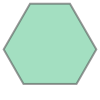

In [38]:
# Define the polygon for the cut
height = np.sqrt(3)/2
epsilon = 0.01 # to shift the boundary of the polygon slightly so that the region counts correct points within the boundary
polygon = Polygon([(3 - epsilon, 0 - epsilon), (7 + epsilon, 0 - epsilon), (8.5 + epsilon, 3 * height + epsilon), 
                   (6.5 + epsilon, 7 * height + epsilon), (3.5 - epsilon, 7 * height + epsilon), (1.5 - epsilon, 3 * height + epsilon)])
polygon

In [39]:
mesh[0].shape

(3, 2)

In [41]:
mesh[0]

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [40]:
mesh[1].shape

(3, 2)

In [42]:
mesh[1]

array([[0., 0.],
       [1., 1.],
       [2., 2.]])

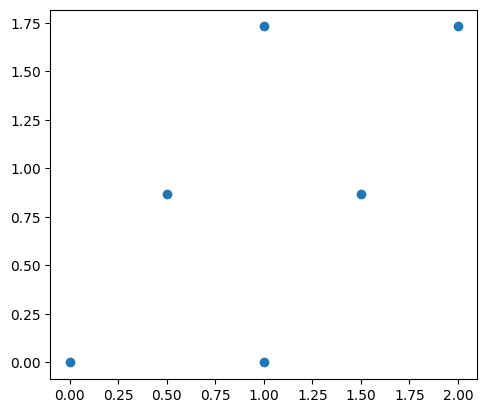

In [43]:
fig, ax = plt.subplots(1,1)
my_x, my_y = lattice.convert_to_XY(BZ_kpoints)
ax.scatter(my_x, my_y)
ax.set_aspect("equal")